Exercise 1

1. Load the CIFAR-10 dataset

2. Implement a CNN model (e.g. 5 conv layers) with <=100 features on output

3. Train the discriminator using triplet loss

4. Save the weights of trained discriminator model

5. Build a model for classification of CIFAR-10, starting with the layers from discriminator and one or two fully-connected layers after that

6. Train this model in the following scenarios and compare results:

a. Randomly initialized model

b. Model with weights for convolutional layers loaded from trained discriminator, fully-connected layers initialized randomly

c. Model with weights for convolutional layers loaded from trained discriminator and freezed, fully-connected layers initialized randomly

In [136]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [137]:
train_dataset , test_dataset = cifar10.load_data()

In [138]:
x_train.shape

(50000, 32, 32, 3)

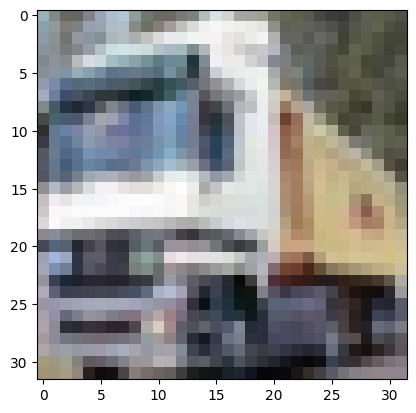

In [139]:
plt.imshow(x_train[1])

C:\Users\akopa\AppData\Local\Temp\ipykernel_8476\1710894633.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


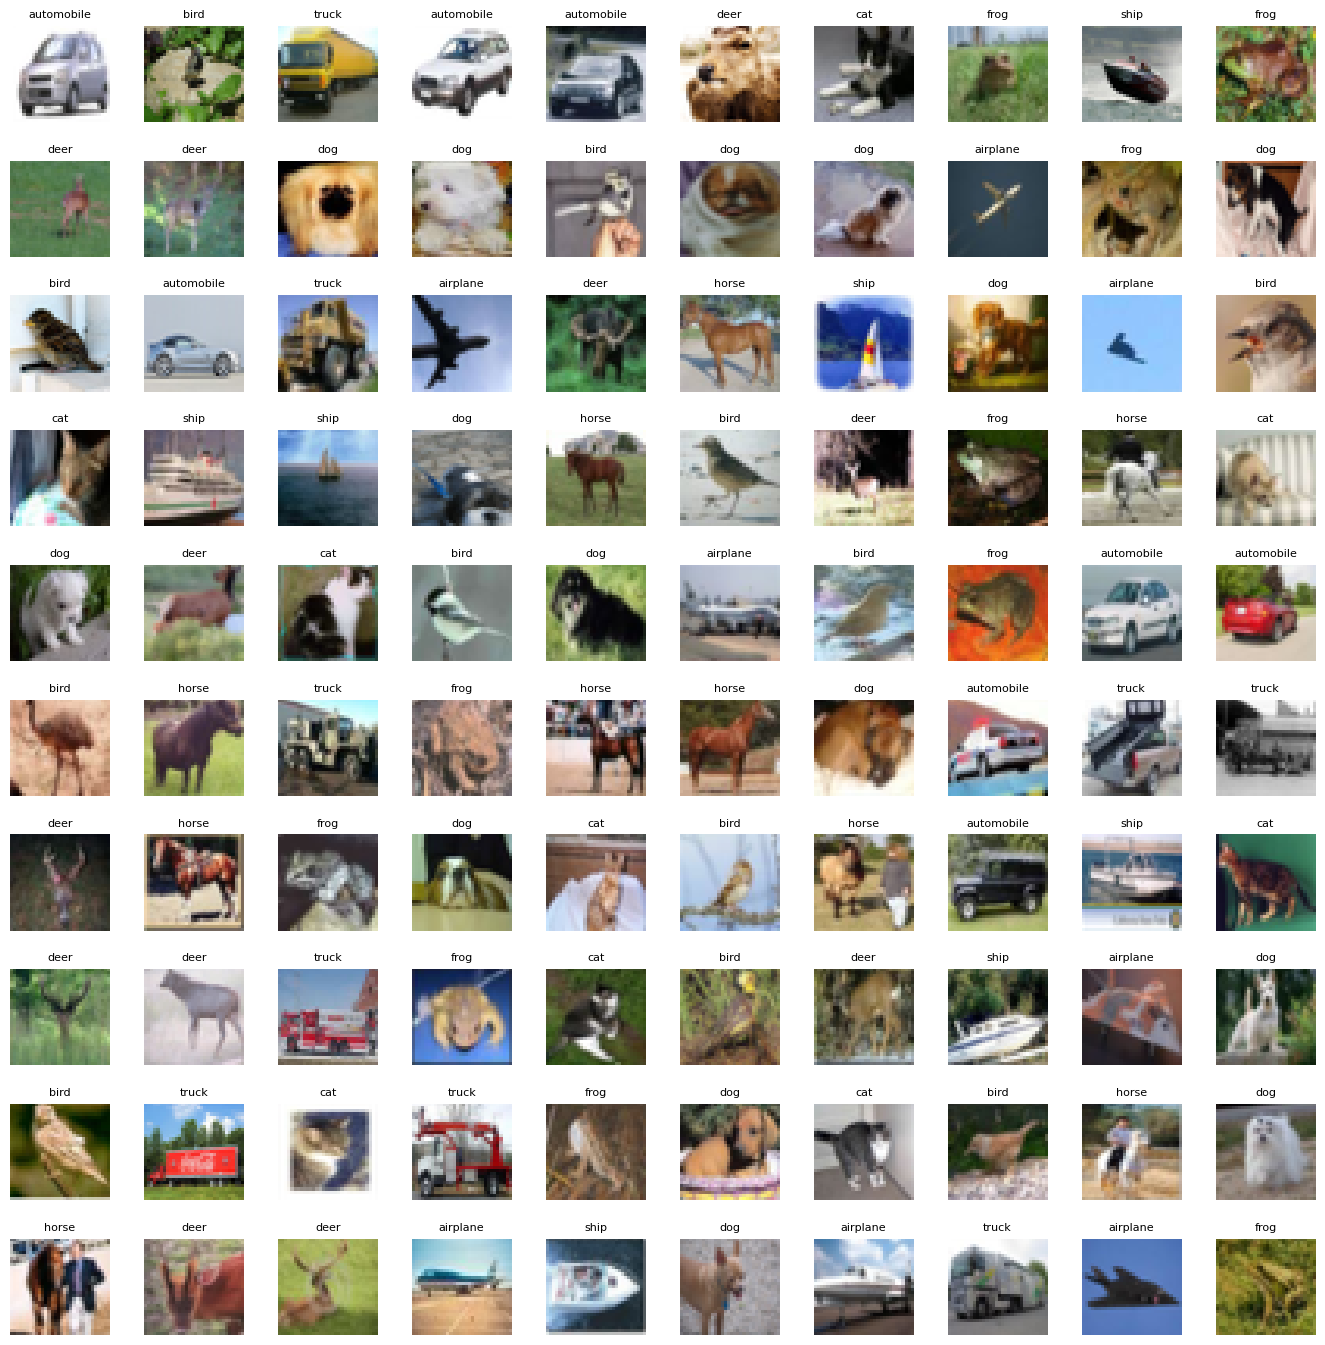

In [140]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [141]:
x_train.shape

(50000, 32, 32, 3)

some preprocessing

In [142]:
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train = x_train/255.0
x_test = x_test/255.0

In [143]:
# define discriminator 

model = keras.Sequential()
model.add(keras.Input((32,32,3)))
model.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128))  # Output embeddings


In [144]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,088 (1.27 MB)

 Trainable params: 333,088 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [145]:
# from triplet import TripletSemiHardLoss
from tensor_addons_triplet_loss import TripletSemiHardLoss

In [146]:
model.compile(optimizer='adam',
              loss=TripletSemiHardLoss())

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3825 - val_loss: 0.2503
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2310 - val_loss: 0.1995
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1870 - val_loss: 0.1525
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1597 - val_loss: 0.1308
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1269 - val_loss: 0.1116
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1100 - val_loss: 0.0989
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1049 - val_loss: 0.1092
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0917 - val_loss: 0.0865
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0938 - val_loss: 0.0913
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0825 - val_loss: 0.0735


In [147]:
model.save_weights("discriminator.weights.h5")

In [148]:
model.layers

[<Conv2D name=conv2d_80, built=True>,
 <MaxPooling2D name=max_pooling2d_64, built=True>,
 <Conv2D name=conv2d_81, built=True>,
 <MaxPooling2D name=max_pooling2d_65, built=True>,
 <Conv2D name=conv2d_82, built=True>,
 <MaxPooling2D name=max_pooling2d_66, built=True>,
 <Conv2D name=conv2d_83, built=True>,
 <MaxPooling2D name=max_pooling2d_67, built=True>,
 <Conv2D name=conv2d_84, built=True>,
 <Flatten name=flatten_16, built=True>]

In [149]:
# Load weights into an existing model
model.load_weights('discriminator.weights.h5')

In [150]:
def create_model():
    # same is discriminator
    model_random = keras.Sequential()
    model_random.add(keras.Input((32,32,3)))
    model_random.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.Flatten())
    # model.add(keras.layers.Dense(128))  # Output embeddings
    # fully connected layers
    
    model_random.add(keras.layers.Dense(128,activation='relu'))
    model_random.add(keras.layers.Dense(10,activation='softmax'))
    
        
    return model_random


In [151]:
model_random = create_model()


In [152]:
model_random.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_85 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,890 (1.34 MB)

 Trainable params: 350,890 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [153]:
def accuracy_fn(y_pred , y):
    y_pred = np.array(y_pred)
    y = np.array(y)
    counter = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            counter +=1
    return 1 - counter / len(y)

In [154]:
train_labels_oh , test_labels_oh = keras.utils.to_categorical(y_train, num_classes=10),keras.utils.to_categorical(y_test,num_classes = 10) # 1 hot encoding 

In [155]:
model_random.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history1 = model_random.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3486 - loss: 1.7402 - val_accuracy: 0.5638 - val_loss: 1.2182
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6070 - loss: 1.0927 - val_accuracy: 0.6366 - val_loss: 1.0530
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6989 - loss: 0.8482 - val_accuracy: 0.6819 - val_loss: 0.9028
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7494 - loss: 0.7132 - val_accuracy: 0.7145 - val_loss: 0.8257
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7873 - loss: 0.6135 - val_accuracy: 0.7161 - val_loss: 0.8323
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8152 - loss: 0.5311 - val_accuracy: 0.7151 - val_loss: 0.8655
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8387 - loss: 0.4576 - val_accuracy: 0.7364 - val_loss: 0.8149
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8639 - loss: 0.3885 - 

In [156]:
y_pred = np.argmax(model_random(x_test),axis = 1)
accuracy_fn(y_pred,y_test)

0.7378

In [157]:
model_from_dis = create_model()

In [158]:
model_from_dis.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_90 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,890 (1.34 MB)

 Trainable params: 350,890 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [159]:
model_from_dis.load_weights("discriminator.weights.h5",skip_mismatch = True)

c:\Users\akopa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:629: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_33, built=True>:

Layer 'dense_33' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_33, built=True>, <Dense name=dense_34, built=True>]
  warnings.warn(msg)


In [160]:
model_from_dis.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history2 = model_from_dis.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5447 - loss: 1.5511 - val_accuracy: 0.6684 - val_loss: 0.9422
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6912 - loss: 0.8680 - val_accuracy: 0.6834 - val_loss: 0.8950
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7432 - loss: 0.7323 - val_accuracy: 0.7087 - val_loss: 0.8354
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7768 - loss: 0.6410 - val_accuracy: 0.7212 - val_loss: 0.8027
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8044 - loss: 0.5576 - val_accuracy: 0.7166 - val_loss: 0.8465
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8337 - loss: 0.4748 - val_accuracy: 0.7191 - val_loss: 0.8784
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8546 - loss: 0.4211 - val_accuracy: 0.7252 - val_loss: 0.8859
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8703 - loss: 0.3745 - 

In [161]:
model_from_dis_frozen = create_model()

In [165]:
model_from_dis_frozen.load_weights("discriminator.weights.h5",skip_mismatch = True)

c:\Users\akopa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\akopa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:629: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_35, built=True>:

Layer 'dense_35' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_35, built=True>, <Dense name=dense_36, built=True>]
  warnings.warn(msg)


In [166]:
for layer in model_from_dis_frozen.layers[:-2]:   # layers that was included in discrimator 
    layer.trainable = False

In [167]:
model_from_dis_frozen.layers[0].trainable

False

In [168]:
model_from_dis_frozen.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history3 = model_from_dis_frozen.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3878 - loss: 361.9574 - val_accuracy: 0.5238 - val_loss: 25.5676
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5209 - loss: 19.3074 - val_accuracy: 0.5200 - val_loss: 10.5538
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5203 - loss: 8.3350 - val_accuracy: 0.5286 - val_loss: 5.4880
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5286 - loss: 4.7509 - val_accuracy: 0.5197 - val_loss: 4.0750
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5393 - loss: 3.1641 - val_accuracy: 0.4939 - val_loss: 2.8323
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5439 - loss: 2.3187 - val_accuracy: 0.5251 - val_loss: 2.1423
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5503 - loss: 1.9330 - val_accuracy: 0.5556 - val_loss: 1.8105
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5538 - loss: 1.78